In [3]:
import random
from random import randint
random.seed(14)
x = randint(1,11)
y = randint(1,11)
z = randint(1,11)
print(x,y,z)

2 10 11


In [6]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification

def generate_blobs():
    return make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=0)

def generate_moons():
    return make_moons(n_samples=300, noise=0.05, random_state=0)

def generate_circles():
    return make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=0)

def generate_anisotropic():
    X, y = make_blobs(n_samples=300, centers=3, random_state=0)
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    return np.dot(X, transformation), y

def generate_varied_variance():
    return make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=0)

def generate_noise():
    X = np.random.rand(300, 2)
    return X, np.zeros(300)  # Все точки как один кластер

In [7]:
from sklearn.cluster import AffinityPropagation, Birch
from sklearn.mixture import GaussianMixture

def affinity_propagation_cluster(X):
    model = AffinityPropagation(damping=0.8, random_state=0)
    return model.fit_predict(X)

def birch_cluster(X):
    model = Birch(n_clusters=3, threshold=0.1)
    return model.fit_predict(X)

def gaussian_mixture_cluster(X):
    model = GaussianMixture(n_components=3, random_state=0)
    model.fit(X)
    return model.predict(X)

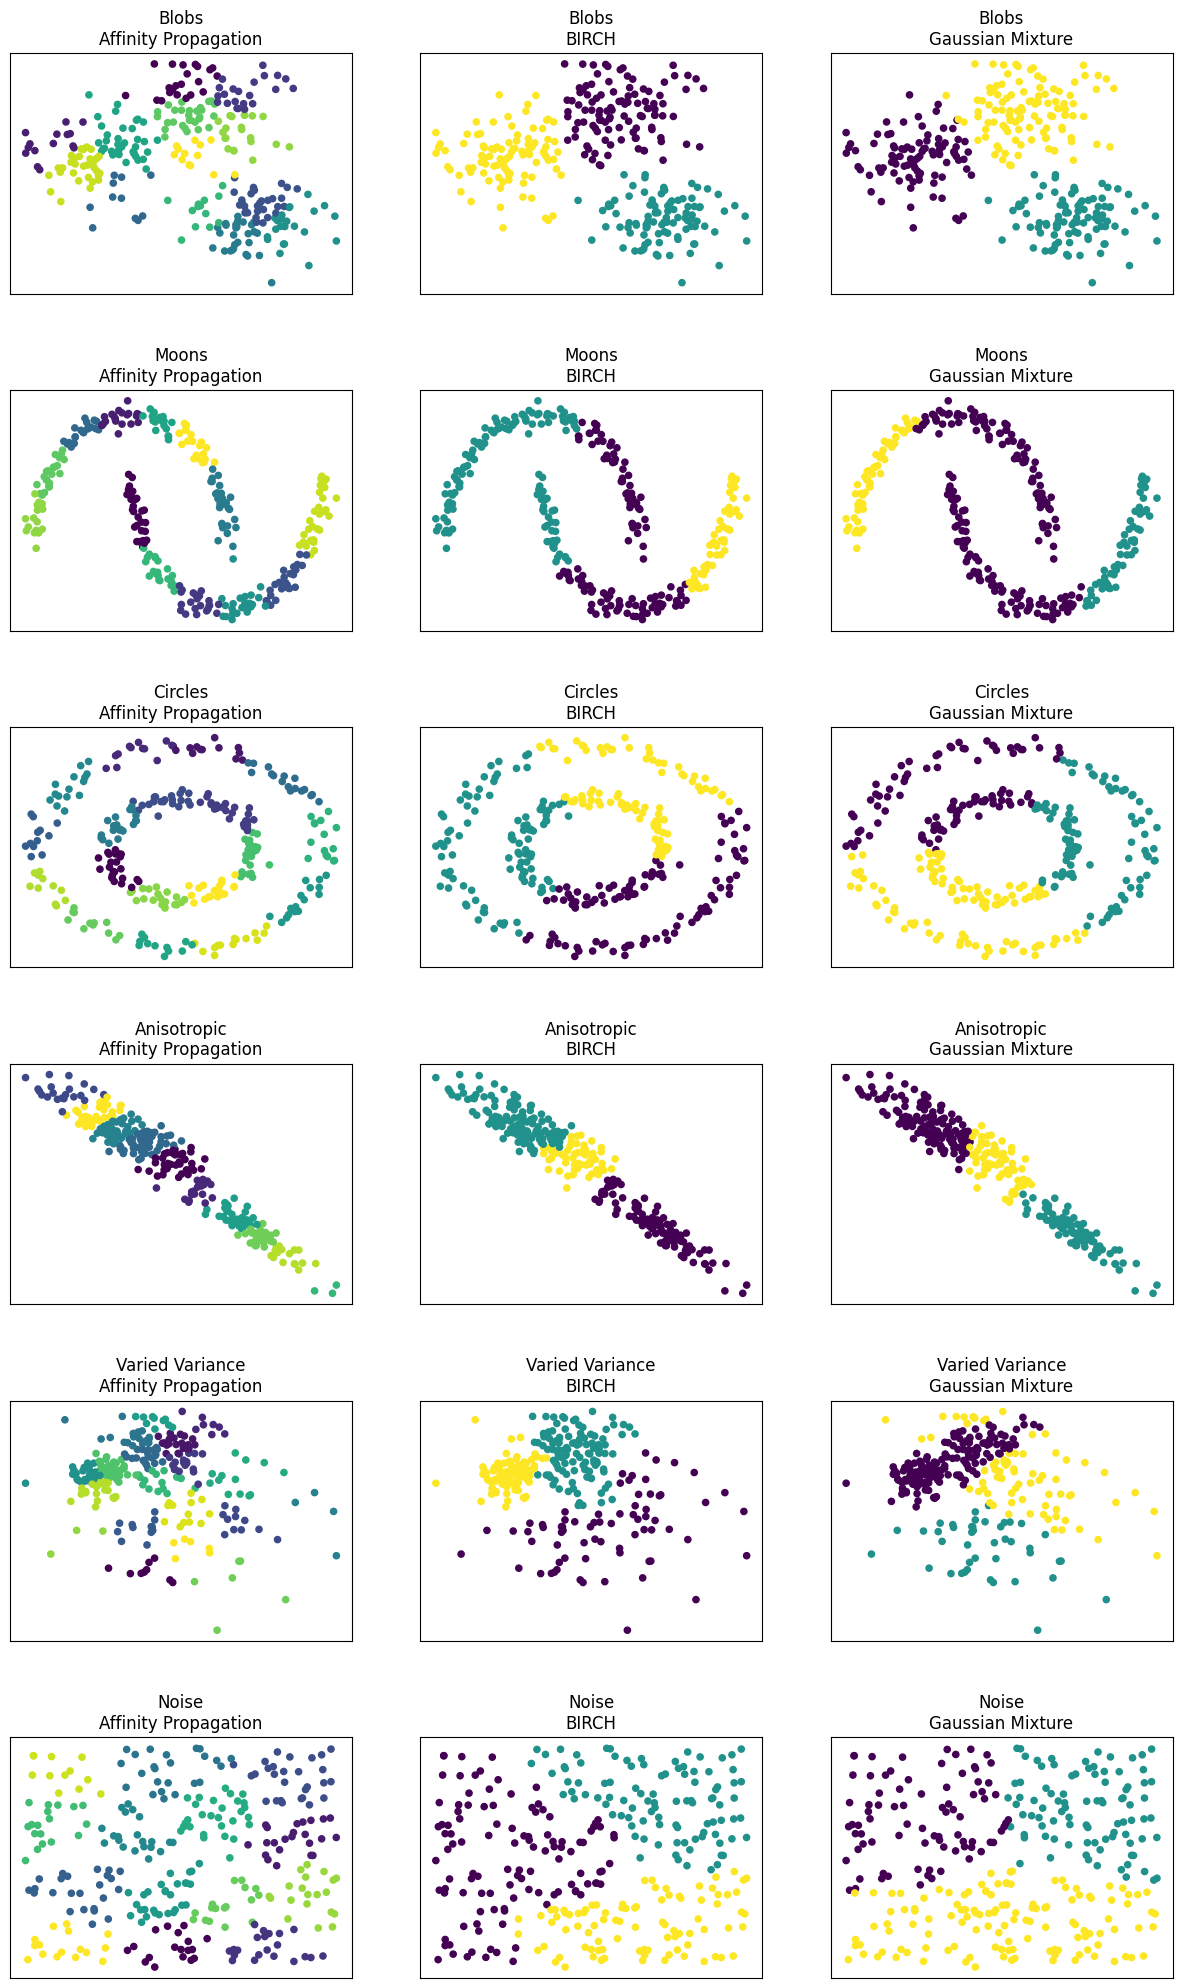

In [8]:
import matplotlib.pyplot as plt

datasets = {
    "Blobs": generate_blobs(),
    "Moons": generate_moons(),
    "Circles": generate_circles(),
    "Anisotropic": generate_anisotropic(),
    "Varied Variance": generate_varied_variance(),
    "Noise": generate_noise()
}

methods = {
    "Affinity Propagation": affinity_propagation_cluster,
    "BIRCH": birch_cluster,
    "Gaussian Mixture": gaussian_mixture_cluster
}

fig, axes = plt.subplots(6, 3, figsize=(15, 25))
plt.subplots_adjust(hspace=0.4)

# Заполнение таблицы
for row_idx, (dataset_name, (X, y_true)) in enumerate(datasets.items()):
    for col_idx, (method_name, method) in enumerate(methods.items()):
        ax = axes[row_idx, col_idx]
        y_pred = method(X)
        ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=20)
        ax.set_title(f"{dataset_name}\n{method_name}")
        ax.set_xticks([])
        ax.set_yticks([])

plt.show()